In [1]:
import pandas as pd


data = pd.read_csv('../data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:

data = data.drop("PassengerId", axis=1)
data = data.drop("Ticket", axis=1)
data = data.drop("Name", axis=1)


data = data.drop_duplicates()

In [90]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [92]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [93]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [94]:
data['Embarked'].value_counts()

S    570
C    155
Q     59
Name: Embarked, dtype: int64

In [95]:
cat_columns = ['Pclass', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Sex']
data_no_cat = pd.get_dummies(data, columns=cat_columns)

In [96]:
data_no_cat.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,38.0,71.2833,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,35.0,53.1000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,35.0,8.0500,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


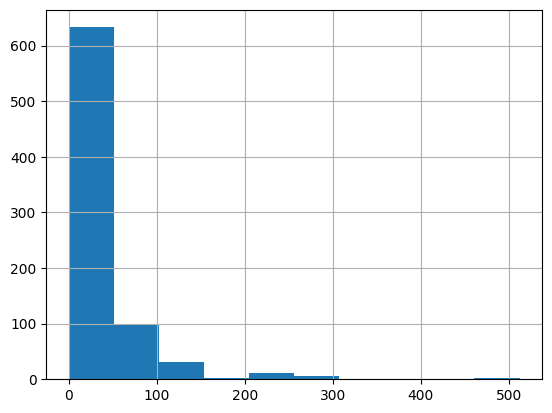

In [97]:
import matplotlib.pyplot as plt
# data_no_cat['Age'].hist()
data_no_cat['Fare'].hist()
plt.show()

In [98]:
X, Y = data_no_cat.drop('Survived', axis=1).values,  data_no_cat['Survived'].values

import sklearn as sk
import sklearn.model_selection

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, train_size=0.9, stratify=Y)

In [99]:
x_train[0]

array([48., 65.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.])

In [100]:
import sklearn.preprocessing
scaler = sk.preprocessing.StandardScaler()
scaler.fit(x_train[:, :2])
x_train[:, :2] = scaler.transform(x_train[:, :2])
x_test[:, :2] = scaler.transform(x_test[:, :2])
# TODO: cuidar da dist. exponencial de fare

In [109]:
import sklearn.neighbors

clf = sk.neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
pred_y_train = clf.predict_proba(x_train)

In [110]:
import sklearn.metrics
fpr, tpr, _ = sk.metrics.roc_curve(y_train, pred_y_train[:, 1])

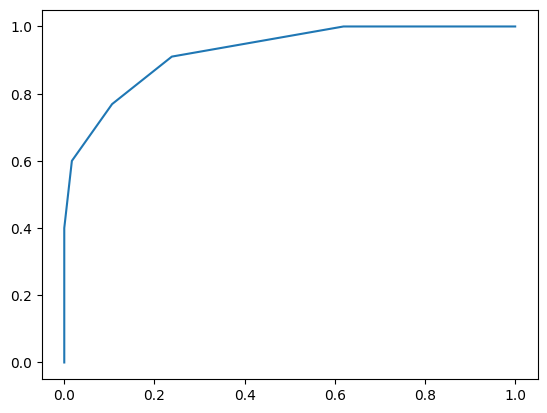

In [112]:
plt.plot(fpr, tpr)
plt.show()

In [115]:
sk.metrics.roc_curve(y_train, pred_y_train[:, 1])


(array([0.        , 0.        , 0.01686747, 0.1060241 , 0.23855422,
        0.61927711, 1.        ]),
 array([0.        , 0.4       , 0.6       , 0.76896552, 0.91034483,
        1.        , 1.        ]),
 array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))

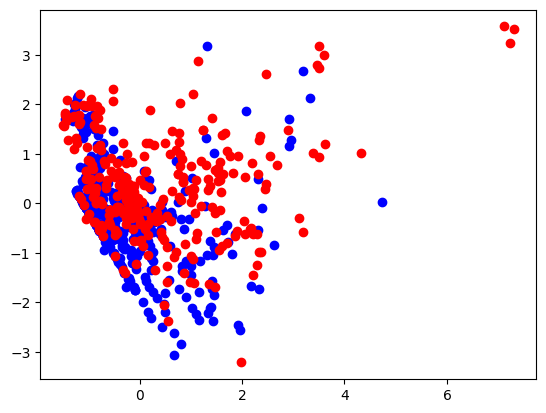

In [120]:
import sklearn.decomposition
pca = sk.decomposition.PCA(n_components=2)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)


plt.scatter(pca_x_train[y_train == 0][:, 0], pca_x_train[y_train == 0][:, 1], c='blue')
plt.scatter(pca_x_train[y_train == 1][:, 0], pca_x_train[y_train == 1][:, 1], c='red')
plt.show()

In [122]:
pca.explained_variance_ratio_

array([0.27934963, 0.21423962])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


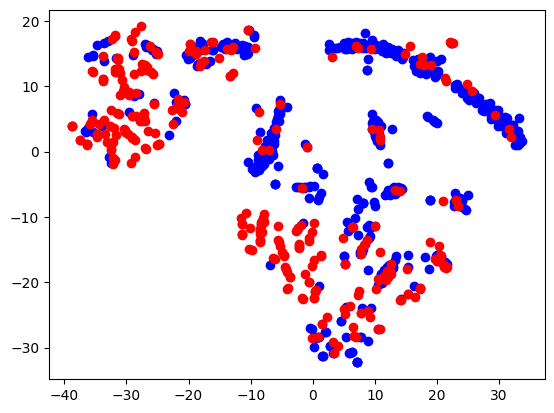

In [125]:
import sklearn.manifold

tsne = sk.manifold.TSNE()
pca_x_train = tsne.fit_transform(x_train)

plt.scatter(pca_x_train[y_train == 0][:, 0], pca_x_train[y_train == 0][:, 1], c='blue')
plt.scatter(pca_x_train[y_train == 1][:, 0], pca_x_train[y_train == 1][:, 1], c='red')
plt.show()